<a href="https://colab.research.google.com/github/Satyake/Getting-Started-with-TF2/blob/main/Assignment_Week_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from scipy.io import loadmat
import keras
import tensorflow as tf

In [ ]:
# Run this cell to load the dataset

train = loadmat("C:/Users/satya/Downloads/train_32x32.mat")
test = loadmat("C:/Users/satya/Downloads/test_32x32.mat")

In [ ]:
import numpy as np 
x_train=train['X']
y_train=train['y']
x_test=test['X']
y_test=test['y']

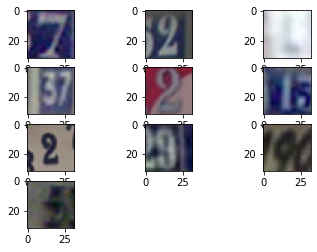

In [ ]:
import matplotlib.pyplot as plt
import random

plt.subplot(4,3,1)
plt.imshow(x_train[:,:,:,random.randint(0,1000)],)
plt.subplot(4,3,2)
plt.imshow(x_train[:,:,:,random.randint(0,1000)])
plt.subplot(4,3,3)
plt.imshow(x_train[:,:,:,random.randint(0,1000)])
plt.subplot(4,3,4)
plt.imshow(x_train[:,:,:,random.randint(0,1000)])
plt.subplot(4,3,5)
plt.imshow(x_train[:,:,:,random.randint(0,1000)])
plt.subplot(4,3,6)
plt.imshow(x_train[:,:,:,random.randint(0,1000)])
plt.subplot(4,3,7)
plt.imshow(x_train[:,:,:,random.randint(0,1000)])
plt.subplot(4,3,8)
plt.imshow(x_train[:,:,:,random.randint(0,1000)])
plt.subplot(4,3,9)
plt.imshow(x_train[:,:,:,random.randint(0,1000)])
plt.subplot(4,3,10)
plt.imshow(x_train[:,:,:,random.randint(0,1000)])

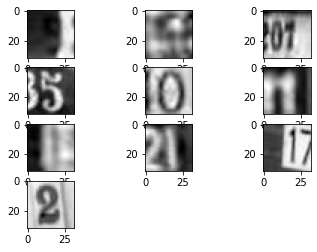

In [ ]:
x_train1=np.mean(x_train , axis=2)
x_test1=np.mean(x_test , axis=2)
#Grayscaled 
plt.subplot(4,3,1)
plt.imshow(x_train1[:,:,random.randint(0,1000)],cmap=plt.cm.gray)
plt.subplot(4,3,2)
plt.imshow(x_train1[:,:,random.randint(0,1000)],cmap=plt.cm.gray)
plt.subplot(4,3,3)
plt.imshow(x_train1[:,:,random.randint(0,1000)],cmap=plt.cm.gray)
plt.subplot(4,3,4)
plt.imshow(x_train1[:,:,random.randint(0,1000)],cmap=plt.cm.gray)
plt.subplot(4,3,5)
plt.imshow(x_train1[:,:,random.randint(0,1000)],cmap=plt.cm.gray)
plt.subplot(4,3,6)
plt.imshow(x_train1[:,:,random.randint(0,1000)],cmap=plt.cm.gray)
plt.subplot(4,3,7)
plt.imshow(x_train1[:,:,random.randint(0,1000)],cmap=plt.cm.gray)
plt.subplot(4,3,8)
plt.imshow(x_train1[:,:,random.randint(0,1000)],cmap=plt.cm.gray)
plt.subplot(4,3,9)
plt.imshow(x_train1[:,:,random.randint(0,1000)],cmap=plt.cm.gray)
plt.subplot(4,3,10)
plt.imshow(x_train1[:,:,random.randint(0,1000)],cmap=plt.cm.gray)

In [ ]:
x_train=np.moveaxis(x_train,-1,0)
x_test=np.moveaxis(x_test,-1,0)

In [ ]:
x_train.shape

(73257, 32, 32, 3)

In [ ]:
y_train

array([[1],
       [9],
       [2],
       ...,
       [1],
       [6],
       [9]], dtype=uint8)

In [ ]:
from keras.layers  import Dense, Flatten, Conv2D, MaxPooling2D,Dropout,BatchNormalization
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau,EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [ ]:
from sklearn import preprocessing
OHE=OneHotEncoder(handle_unknown='ignore')
y_train=OHE.fit_transform(y_train).toarray()
y_test=OHE.fit_transform(y_test).toarray()

In [ ]:
(x_train1,x_test1,y_train1,y_test1)=train_test_split(x_train,y_train,test_size=0.2,random_state=0)

In [ ]:
y_train1.shape
y_test1.shape

(14652, 10)

In [ ]:
y_train

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [ ]:
x_train[0].shape

(32, 32, 3)

In [ ]:
def MLP():
    model=Sequential([
         Flatten(input_shape=(32,32,3)),
                        Dense(128, activation='relu'), #layer1
                        Dense(256, activation='relu'), #layer2
                        Dense(256, activation='relu'), #Layer3
                        Dense(512, activation='relu'), #Layer4
                        Dense(10, activation='softmax')#Layer5  
    ])
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
    return model

In [ ]:
checkpoint_path=\
'checkpoint/chkpnt'

best_weights=tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path, monitor='val_loss', verbose=0, save_best_only=True,
    save_weights_only=True, mode='min', save_freq='epoch',
)

ES=tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_accuracy'

)

In [ ]:
model=MLP()
model.summary()


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_31 (Dense)             (None, 128)               393344    
_________________________________________________________________
dense_32 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_33 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_34 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_35 (Dense)             (None, 10)                5130      
Total params: 628,874
Trainable params: 628,874
Non-trainable params: 0
________________________________________________

In [ ]:
history1=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=30,batch_size=128,callbacks=[ES,best_weights])

Epoch 1/30
573/573 [==============================] - 3s 5ms/step - loss: 6.6633 - accuracy: 0.1894 - val_loss: 2.2245 - val_accuracy: 0.1956
Epoch 2/30
573/573 [==============================] - 3s 4ms/step - loss: 2.2240 - accuracy: 0.1891 - val_loss: 2.2275 - val_accuracy: 0.1957
Epoch 3/30
573/573 [==============================] - 3s 4ms/step - loss: 2.2372 - accuracy: 0.1894 - val_loss: 2.2238 - val_accuracy: 0.1956
Epoch 4/30
573/573 [==============================] - 3s 5ms/step - loss: 2.2371 - accuracy: 0.1893 - val_loss: 2.2251 - val_accuracy: 0.1958
Epoch 5/30
573/573 [==============================] - 3s 4ms/step - loss: 2.2371 - accuracy: 0.1892 - val_loss: 2.2248 - val_accuracy: 0.1958
Epoch 6/30
573/573 [==============================] - 3s 5ms/step - loss: 2.2369 - accuracy: 0.1892 - val_loss: 2.2241 - val_accuracy: 0.1959
Epoch 7/30
573/573 [==============================] - 3s 5ms/step - loss: 2.2370 - accuracy: 0.1892 - val_loss: 2.2240 - val_accuracy: 0.1958
Epoch 

Text(0, 0.5, 'Accuracy')

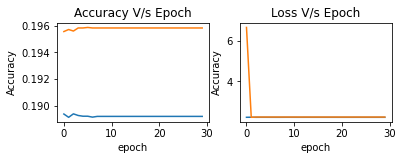

In [ ]:
plt.subplot(2,2,1)
plt.title('Accuracy V/s Epoch')
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('Accuracy')

plt.subplot(2,2,2)
plt.title('Loss V/s Epoch')
plt.plot(history1.history['val_loss'])
plt.plot(history1.history['loss'])
plt.plot()
plt.xlabel('epoch')
plt.ylabel('Accuracy')

In [ ]:
checkpoint_path_CNN=\
'checkpoint_CNN/chkpnt'

best_weights_CNN=tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path, monitor='val_loss', verbose=0, save_best_only=True,
    save_weights_only=True, mode='min', save_freq='epoch',
)

ES_CNN=tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_accuracy'

)

In [ ]:
def CNN():
    model=Sequential([
            Conv2D(32, (5, 5),  
                           activation='tanh',
                           input_shape=(32, 32, 3)),
        Conv2D(16,(3,3),activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2,2)),
        Dropout(0.2),
        Flatten(),
        Dense(100,activation='tanh'),
        Dense(10,activation='softmax')
 
    ])
    model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
    return model

In [ ]:
model1=CNN()
model1.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 32)        2432      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 26, 26, 16)        4624      
_________________________________________________________________
batch_normalization_3 (Batch (None, 26, 26, 16)        64        
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 13, 13, 16)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 2704)              0         
_________________________________________________________________
dense_36 (Dense)             (None, 100)              

In [ ]:
history2=model1.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=30,batch_size=128,callbacks=[best_weights_CNN,ES_CNN])

Epoch 1/30
573/573 [==============================] - 27s 47ms/step - loss: 1.1308 - accuracy: 0.6421 - val_loss: 0.9815 - val_accuracy: 0.6995
Epoch 2/30
573/573 [==============================] - 26s 45ms/step - loss: 0.6763 - accuracy: 0.7937 - val_loss: 1.2560 - val_accuracy: 0.6045
Epoch 3/30
573/573 [==============================] - 26s 45ms/step - loss: 0.5930 - accuracy: 0.8179 - val_loss: 0.9614 - val_accuracy: 0.7008
Epoch 4/30
573/573 [==============================] - 26s 46ms/step - loss: 0.5563 - accuracy: 0.8291 - val_loss: 1.5976 - val_accuracy: 0.4469
Epoch 5/30
573/573 [==============================] - 26s 46ms/step - loss: 0.5337 - accuracy: 0.8356 - val_loss: 0.8622 - val_accuracy: 0.7273
Epoch 6/30
573/573 [==============================] - 26s 45ms/step - loss: 0.5064 - accuracy: 0.8463 - val_loss: 1.1991 - val_accuracy: 0.6016
Epoch 7/30
573/573 [==============================] - 26s 46ms/step - loss: 0.4977 - accuracy: 0.8464 - val_loss: 0.6308 - val_accuracy:

Text(0, 0.5, 'val_loss')

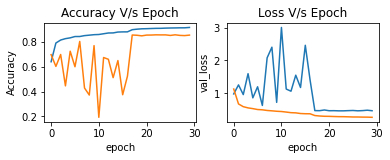

In [ ]:
plt.subplot(2,2,1)
plt.title('Accuracy V/s Epoch')
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('Accuracy')

plt.subplot(2,2,2)
plt.title('Loss V/s Epoch')
plt.plot(history2.history['val_loss'])
plt.plot(history2.history['loss'])
plt.plot()
plt.xlabel('epoch')
plt.ylabel('val_loss')

In [ ]:
preds_cnn=model1.predict(x_test)
actual=OHE.inverse_transform(y_test)

In [ ]:
preds_cnn_inverted=OHE.inverse_transform(preds_cnn)
import seaborn as sb

array([[5],
       [2],
       [1],
       ...,
       [7],
       [6],
       [7]], dtype=uint8)

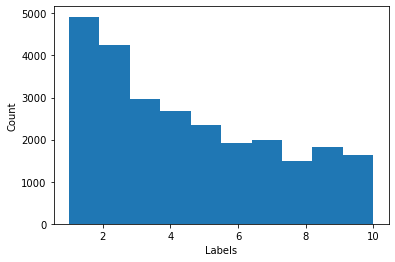

In [ ]:
import matplotlib.pyplot as plt
plt.hist(preds_cnn_inverted)
plt.xlabel('Labels')
plt.ylabel('Count')
preds_cnn_inverted

array([[5],
       [2],
       [1],
       ...,
       [7],
       [6],
       [7]], dtype=uint8)

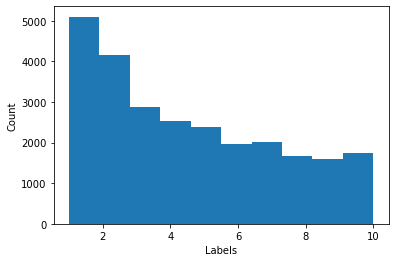

In [ ]:
import matplotlib.pyplot as plt
plt.hist(actual)
plt.xlabel('Labels')
plt.ylabel('Count')
preds_cnn_inverted

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,multilabel_confusion_matrix

In [ ]:
def show_predictive_distribution(model):

    num_test_images = x_test.shape[0]

    random_inx = np.random.choice(num_test_images, 5)
    random_test_images = x_test[random_inx, ...]
    random_test_labels = OHE.inverse_transform(y_test[random_inx, ...])

    predictions = model.predict(random_test_images)

    fig, axes = plt.subplots(5, 2, figsize=(16, 12))
    fig.subplots_adjust(hspace=0.4, wspace=-0.2)

    for i, (prediction, image, label) in enumerate(zip(predictions, random_test_images, random_test_labels)):
        axes[i, 0].imshow(np.squeeze(image))
        axes[i, 0].get_xaxis().set_visible(False)
        axes[i, 0].get_yaxis().set_visible(False)
        axes[i, 0].text(10., -1.5, f'Digit {label}')
        axes[i, 1].bar(np.arange(len(prediction)), prediction)
        axes[i, 1].set_xticks(np.arange(len(prediction)))
        axes[i, 1].set_title(f"Categorical distribution. Model prediction: {np.argmax(prediction)}")
    
    plt.show()

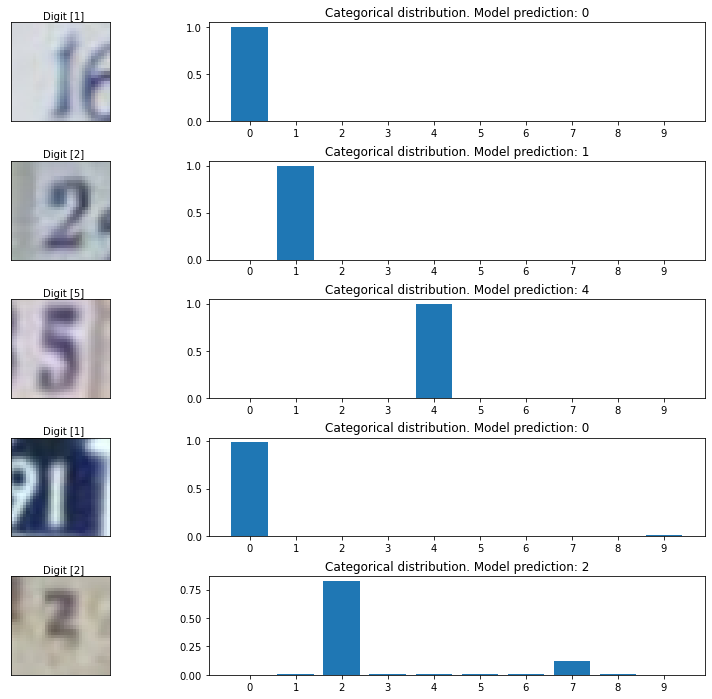

In [ ]:
show_predictive_distribution(model1)